In [ ]:
# convolution operation
# kernel/filter
# stepsize
# padding
# maxpool 

In [7]:
import numpy as np

import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h)
y  

array([ 6, 14, 34, 34,  8])

In [ ]:
# linear algebra of example

# [2  6]
#  |  |
#  V  V
#  0 [1 2 5 4] #padding with 0

# =>  2 * 0 + 6 * 1 = 6

#   [2  6]  
#    |  |  
#    V  V  
# 0 [1  2  5  4]  

# =>2 * 1 + 6 * 2 = 14

#      .
#      .
#      .


#            [2  6]
#             |  |
#             V  V
# 0 [1  2  5  4] 0  

# => 2 * 4 + 6 * 0 = 8


In [ ]:
#apply convolution using tensorflow

In [10]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


In [15]:
input = tf.Variable(tf.random.normal([1, 10, 10, 1]))
input.numpy()[0][0]

array([[-0.6317814 ],
       [ 0.72318745],
       [ 0.17999259],
       [-0.5561014 ],
       [-0.72948587],
       [-1.3698692 ],
       [ 2.5643435 ],
       [-0.9252161 ],
       [ 0.14291991],
       [ 0.5371328 ]], dtype=float32)

In [21]:
filter = tf.Variable(tf.random.normal([3, 3, 1, 1]))
filter.numpy()[0]

array([[[ 0.8884843]],

       [[-0.5505374]],

       [[-0.6660368]]], dtype=float32)

In [25]:
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')#without padding
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')#with padding

# print("Input \n")
# print('{0} \n'.format(input.numpy()))
# print("Filter/Kernel \n")
# print('{0} \n'.format(filter.numpy()))
# print("Result/Feature Map with valid positions \n")
# print(op.numpy())
# print('\n')
# print("Result/Feature Map with padding \n")
# print(op2.numpy())

op.shape,op2.shape

(TensorShape([1, 8, 8, 1]), TensorShape([1, 10, 10, 1]))

In [26]:
#apply convolution to images

In [28]:
# import data
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


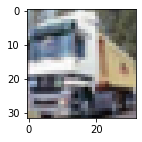

(32, 32, 3)

In [52]:

import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(2,2))

plt.imshow(train_images[1])
plt.show()
train_images[1].shape



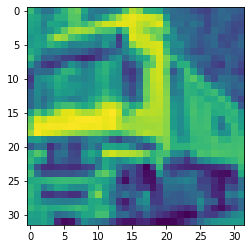

(32, 32)

In [60]:
#flatten image from rgb to monochrome
img = np.dot(train_images[1][...,:3], [0.3, 0.3, 0.3])
plt.imshow(img)
plt.show()
img.shape

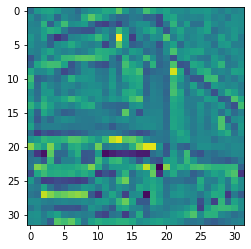

(32, 32)

In [75]:
#now we will apply an edge detect kernel to above data
from scipy import signal
from scipy import misc

kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0]]) 

grad = signal.convolve2d(img, kernel, mode='same', boundary='symm')
plt.imshow(grad)
plt.show()
grad.shape

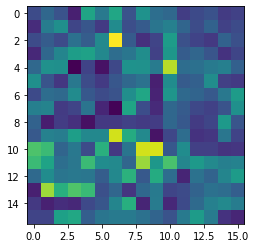

(16, 16)

In [76]:
#max pooling 
import skimage.measure
a = skimage.measure.block_reduce(grad, (2,2), np.max)

plt.imshow(a)
plt.show()
a.shape